This program takes the magnetic field measurements from several .h5 files and combines them into one

In [24]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt

# Unify the data

In [26]:
variables = {'V0', 'X1', 'X2', 'X3', 'Y1', 'Y2', 'Y3', 'Z1', 'Z2'}
data = {var: np.array([]) for var in variables} # Each array in this dictionaty corresponds to a measured field

folder_path = 'experimental_data\magnitometer_data' # Location of the h5 files

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a .h5 file
    if filename.endswith('.h5'):
        # Get the full path to the file
        file_path = os.path.join(folder_path, filename)
        # Access a measurement and add it to the corresponding array in the dictionary
        with h5py.File(file_path, 'r') as f:
            traces = f['data']['traces']
            for group in traces:
                data[group] = np.concatenate((data[group], traces[group][()]['values']))

# Plot to check if it worked

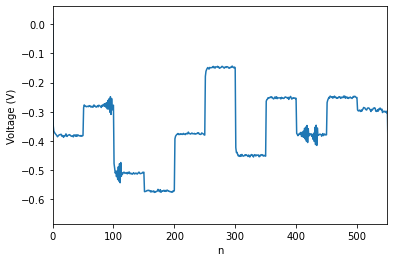

In [19]:
plt.plot(data['V0'])
plt.xlabel('n')
plt.ylabel('Voltage (V)')
plt.xlim(0,550)
plt.show()

# Save the unified data into a single h5 file

In [ ]:
# Open an HDF5 file for writing
with h5py.File('all_data.h5', 'w') as f:

    # Write the dictionary to the file
    for key, value in data.items():
        if isinstance(value, str):
            # Strings need to be encoded as ASCII before they can be written to an HDF5 file
            value = value.encode('ascii')
        f.create_dataset(key, data=value)

# Denoising the data

In [39]:
step = 50 # Number of point per 1 measurement step

clean_data = {}

for key in variables:
    data_2d = data[key].reshape(-1,step)
    mean_values = np.mean(data_2d, axis=1)
    mean_values_1d = np.repeat(mean_values, step)[:len(data[key])]
    clean_data[key] = mean_values_1d

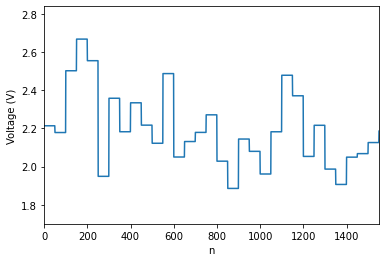

In [40]:
plt.plot(clean_data['X1'])
plt.xlabel('n')
plt.ylabel('Voltage (V)')
plt.xlim(0,1550)
plt.show()